## 6 - Displaying Formations on Log Plots
Created by: Andy McDonald

This short notebook illustrates how to add background shading to each of the curve tracks based on formations contained within a dictionary object.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
root = '/users/kai/desktop/data_science/data/dongara'
well_name = 'dongara_24'
file_format = '.csv'
well = pd.read_csv(os.path.join(root,well_name+file_format), header=0)

In [71]:
well.dtypes

DEPT    object
CALI    object
DRHO    object
DT      object
GR      object
ILD     object
LLD     object
LLS     object
MSFL    object
NPHI    object
RHOB    object
SFLU    object
SP      object
dtype: object

In [72]:
well.replace(-999.00, np.nan, inplace=True)

In [73]:
well.head(11601)

,DEPT,CALI,DRHO,DT,GR,ILD,LLD,LLS,MSFL,NPHI,RHOB,SFLU,SP
0,M,IN,G/C3,US/F,GAPI,OHMM,OHMM,OHMM,OHMM,PU,G/C3,OHMM,MV
1,5.0292,NaN,NaN,NaN,33.9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.1816,NaN,NaN,NaN,35.6001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.334,NaN,NaN,NaN,40.1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.4864,NaN,NaN,NaN,41.3974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11596,1772.1072,NaN,0.0837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4085,NaN,NaN
11597,1772.2596,NaN,0.0735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3917,NaN,NaN
11598,1772.412,NaN,0.0577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.371,NaN,NaN
11599,1772.5644,NaN,0.0478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.363,NaN,NaN


In [74]:
cols = well.columns[well.dtypes.eq('object')]
well[cols] = well[cols].apply(pd.to_numeric, errors='coerce')
well.dtypes

DEPT    float64
CALI    float64
DRHO    float64
DT      float64
GR      float64
ILD     float64
LLD     float64
LLS     float64
MSFL    float64
NPHI    float64
RHOB    float64
SFLU    float64
SP      float64
dtype: object

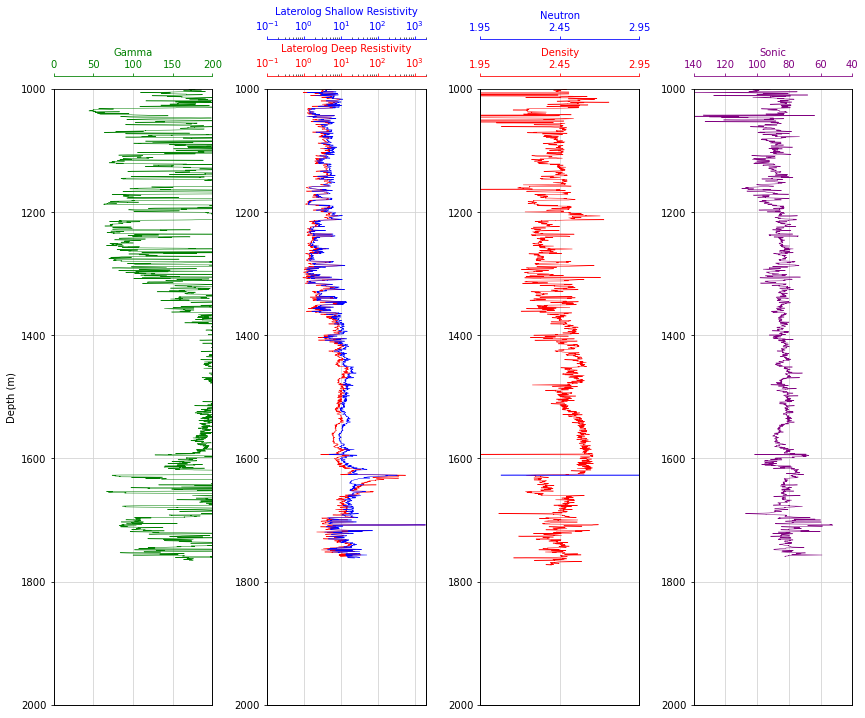

In [75]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
# ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = ax2.twiny()
ax6 = ax3.twiny()

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPT", data = well, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# LLD Resistivity track
ax2.plot("LLD", "DEPT", data = well, color = "red", linewidth = 0.5)
ax2.set_xlabel("Laterolog Deep Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPT", data = well, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPT", data = well, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# # Neutron track placed ontop of density track
# ax5.plot("NPHI", "DEPT", data = well, color = "blue", linewidth = 0.5)
# ax5.set_xlabel('Neutron')
# ax5.xaxis.label.set_color("blue")
# ax5.set_xlim(0.45, -0.15)
# ax5.set_ylim(2000,0)
# ax5.tick_params(axis='x', colors="blue")
# ax5.spines["top"].set_position(("axes", 1.08))
# ax5.spines["top"].set_visible(True)
# ax5.spines["top"].set_edgecolor("blue")
# ax5.set_xticks([0.45,  0.15, -0.15])

# LLS track placed ontop of LLD track
ax5.plot("LLS", "DEPT", data = well, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Laterolog Shallow Resistivity')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.2, 2000)
ax5.set_ylim(2000,1000)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.1, 1, 10, 100, 1000])
ax5.semilogx()

# Neutron track placed ontop of density track
ax6.plot("NPHI", "DEPT", data = well, color = "blue", linewidth = 0.5)
ax6.set_xlabel('Neutron')
ax6.xaxis.label.set_color("blue")
ax6.set_xlim(1.95, 2.95)
ax6.set_ylim(2000,1000)
ax6.tick_params(axis='x', colors="blue")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("blue")
ax6.set_xticks([1.95, 2.45, 2.95])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(2000, 1000)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()

### Displaying shaded formation intervals on the plot

We can use the axhspan functions for shade across each track at specified depth intervals.
To tidy up the plot, we can remove the depth labels for each track. We require a short separation between the tracks due to overlap of the curve scales.

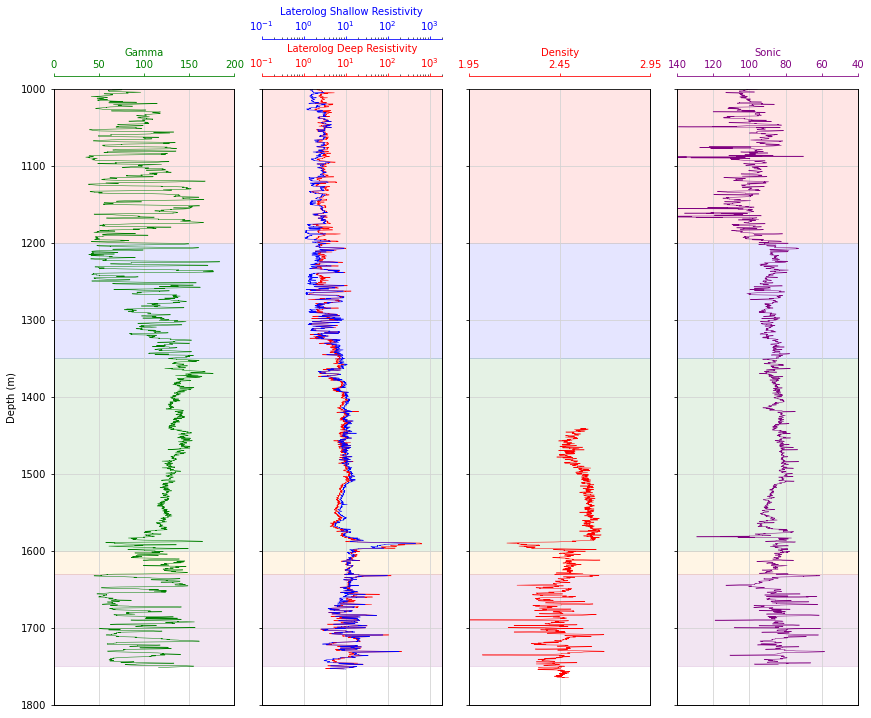

In [52]:
# Create a dictionary of formations with a top and bottom depth
formations = {"A":[1000, 1200], 
              "B": [1200, 1350],
              "C": [1350, 1600],
              "D": [1600, 1630],
              "E": [1630, 1750]} #mock formation top and bottom depth

# Select the same number of colours as there are formations
zone_colours = ["red", "blue", "green", "orange", "purple"]

fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax2.twiny() #Twins the y-axis for the LLS track with the LLD track

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPT", data = well, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# LLD Resistivity track
ax2.plot("LLD", "DEPT", data = well, color = "red", linewidth = 0.5)
ax2.set_xlabel("Laterolog Deep Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPT", data = well, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPT", data = well, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# # Neutron track placed ontop of density track
# ax5.plot("NPHI", "DEPTH", data = well, color = "blue", linewidth = 0.5)
# ax5.set_xlabel('Neutron')
# ax5.xaxis.label.set_color("blue")
# ax5.set_xlim(0.45, -0.15)
# ax5.set_ylim(4150, 3500)
# ax5.tick_params(axis='x', colors="blue")
# ax5.spines["top"].set_position(("axes", 1.08))
# ax5.spines["top"].set_visible(True)
# ax5.spines["top"].set_edgecolor("blue")
# ax5.set_xticks([0.45,  0.15, -0.15])

# LLS track placed ontop of LLD track
ax5.plot("LLS", "DEPT", data = well, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Laterolog Shallow Resistivity')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.2, 2000)
ax5.set_ylim(1800,1000)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.1, 1, 10, 100, 1000])
ax5.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(1800, 1000)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    # loop through the formations dictionary and zone colours
    for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)